In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('collab_ww_bookings.xlsx')

In [3]:
df

,Date,Product Net Bookings
0,2020-07-01,1058139000
1,2020-08-01,235999900
2,2020-09-01,291609300
3,2020-10-01,540158700
4,2020-11-01,294935500
5,2020-12-01,395790800
6,2021-01-01,478762200
7,2021-02-01,269590900
8,2021-03-01,295137400
9,2021-04-01,559113600


In [4]:
df.head()

,Date,Product Net Bookings
0,2020-07-01,1058139000
1,2020-08-01,235999900
2,2020-09-01,291609300
3,2020-10-01,540158700
4,2020-11-01,294935500


In [5]:
df.set_index('Date',inplace=True)

In [6]:
df.head()

,Product Net Bookings
Date,
2020-07-01,1058139000
2020-08-01,235999900
2020-09-01,291609300
2020-10-01,540158700
2020-11-01,294935500


In [7]:
df.describe()

,Product Net Bookings
count,3.700000e+01
mean,3.479292e+08
std,2.289160e+08
min,1.067342e+08
25%,1.973078e+08
50%,2.916093e+08
75%,3.957908e+08
max,1.080281e+09


<Axes: xlabel='Date'>

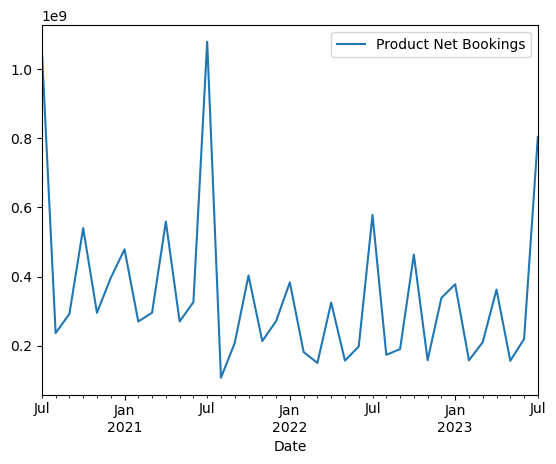

In [8]:
#Step 2. Visualize the Data
df.plot()

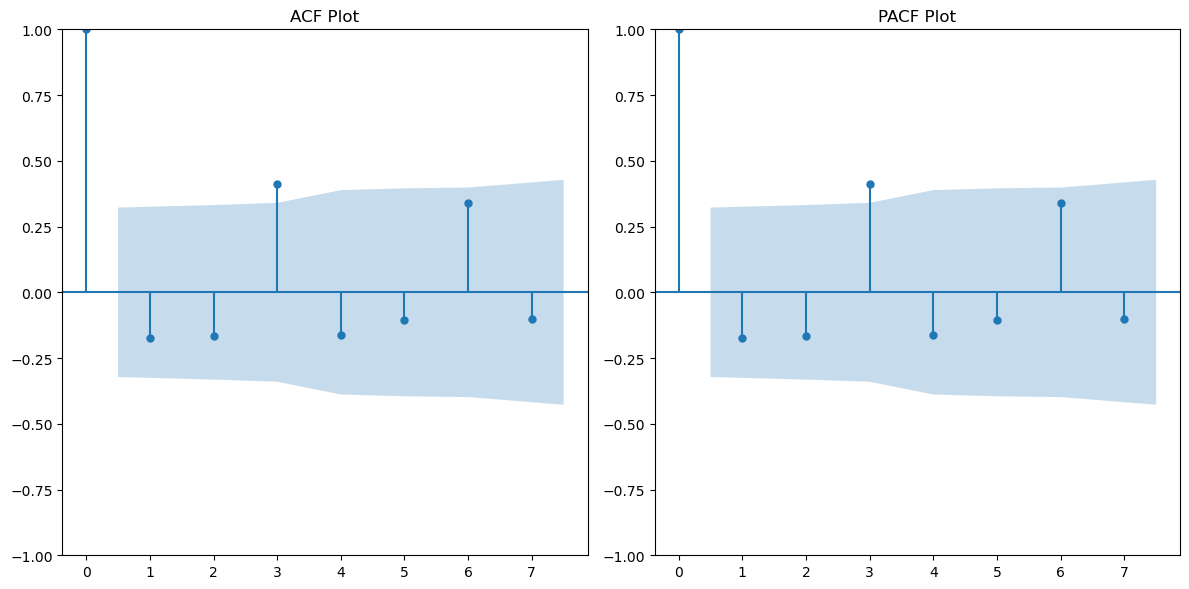

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#ACF plot- Autocorrelation function to get the p value i.e. Max value after which it diminishes (has to be integer)
plt.figure(figsize =(12,6))
plt.subplot(1,2,1)# grid size
plot_acf(df,lags=7, ax=plt.gca()) #display auto correlation values for the first 7 lags 
plt.title('ACF Plot')

#PACF plot-Partial Autocorrelation to get the q value i.e. Max value after which it diminishes (has to be integer)
plt.subplot(1,2,2)# grid size
plot_acf(df,lags=7, ax=plt.gca()) #display auto correlation values for the first 7 lags 
plt.title('PACF Plot')

plt.tight_layout()
plt.show()

In [10]:
###Testing for Stationarity

from statsmodels.tsa.stattools import adfuller

In [11]:
#Null Hypo: It is non stationary
#Alternate Hypo: It is stationary
#95% CI considered

def adfuller_test(Bookings):
    result=adfuller(Bookings)
    labels=['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value, label in zip(result,labels):
        print(label+':'+str(value))
    if result[1] <=.05:
        print("Strong evidence against null hypo")
    else:
        print("Weak evidence against null hypo")

In [12]:
adfuller_test(df['Product Net Bookings'])

ADF Test Statistic:-2.750237004070368
p-value:0.06574113657061496
#Lags Used:2
Number of Observations Used:34
Weak evidence against null hypo


In [13]:
# If it is non stationary we have to make it Stationary
#Differencing and seasonality 3 is considered
df['Seasonal First Difference']=df['Product Net Bookings']-df['Product Net Bookings'].shift(1)

In [14]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic:-3.3071848406949895
p-value:0.01456035076022133
#Lags Used:10
Number of Observations Used:25
Strong evidence against null hypo


<Axes: xlabel='Date'>

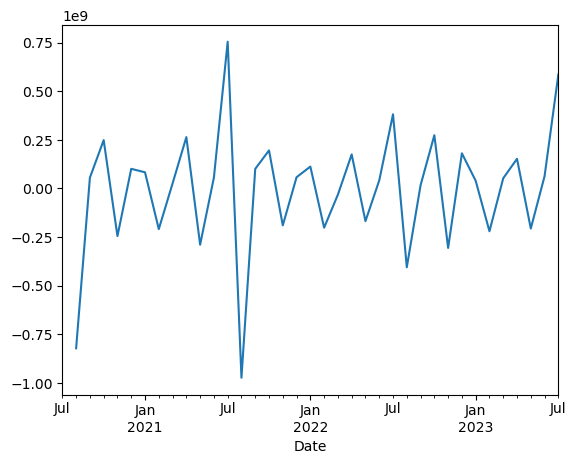

In [15]:
### Plotting the graph
df['Seasonal First Difference'].plot()

In [16]:
### For seasonal data, seasonality 12
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['Product Net Bookings'],order=(1,1,1),seasonal_order=(1,1,1,12))

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [17]:
train_data=model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.33780D+01    |proj g|=  7.54536D-01

At iterate    5    f=  1.30362D+01    |proj g|=  5.69169D-02

At iterate   10    f=  1.30170D+01    |proj g|=  2.93152D-03

At iterate   15    f=  1.30166D+01    |proj g|=  3.11784D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     18      1     0     0   2.068D-06   1.302D+01
  F =   13.016616899354510     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


<Axes: xlabel='Date'>

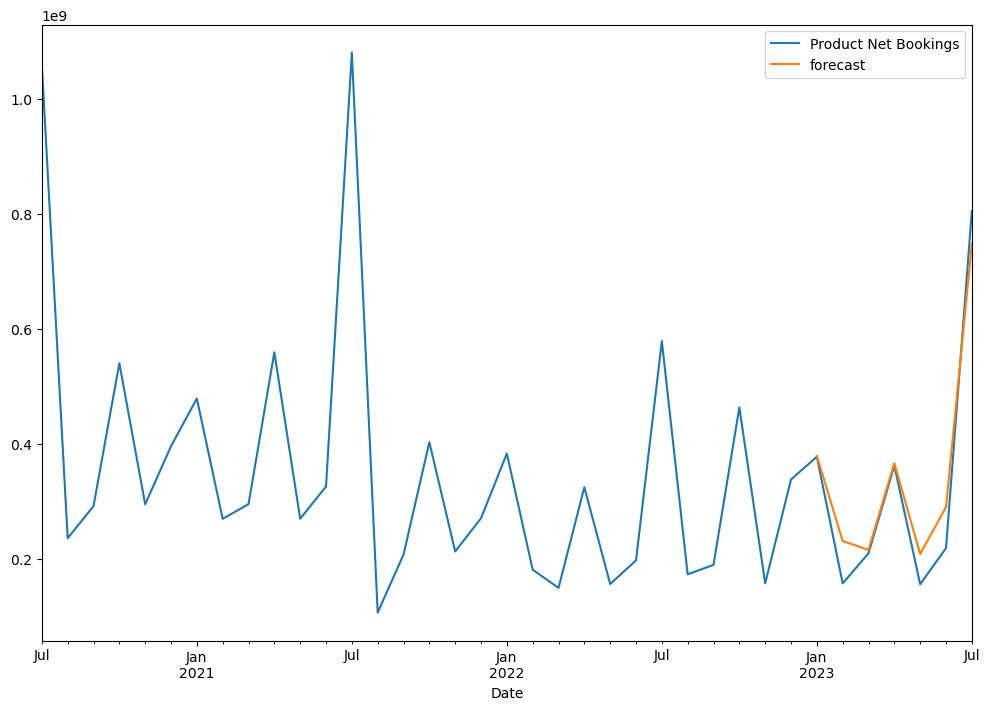

In [18]:
df['forecast']=train_data.predict(start=30, end = 37, dynamic=True) # testing the model performance with sample input i.e. first 5 values as input and predicting 6,7,8
df[['Product Net Bookings','forecast']].plot(figsize=(12,8))
#When setting dynamic=True in train_data.predict, 
#it instructs the model to generate forecasts where each prediction is based 
#on the previously predicted value rather than the actual observed value, 
#essentially creating a "rolling" forecast where the model updates its predictions 
#as it moves through the time series, making it more responsive to recent changes in the data.

In [19]:
### Predicting future forecast
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+DateOffset(months=x)for x in range(1,13,1)]

In [20]:
future_dates

[Timestamp('2023-08-01 00:00:00'),
 Timestamp('2023-09-01 00:00:00'),
 Timestamp('2023-10-01 00:00:00'),
 Timestamp('2023-11-01 00:00:00'),
 Timestamp('2023-12-01 00:00:00'),
 Timestamp('2024-01-01 00:00:00'),
 Timestamp('2024-02-01 00:00:00'),
 Timestamp('2024-03-01 00:00:00'),
 Timestamp('2024-04-01 00:00:00'),
 Timestamp('2024-05-01 00:00:00'),
 Timestamp('2024-06-01 00:00:00'),
 Timestamp('2024-07-01 00:00:00')]

In [21]:
future_dataset_df=pd.DataFrame(index=future_dates,columns=df.columns)
future_dataset_df.index.name = 'Date'

In [22]:
future_dataset_df

,Product Net Bookings,Seasonal First Difference,forecast
Date,,,
2023-08-01,NaN,NaN,NaN
2023-09-01,NaN,NaN,NaN
2023-10-01,NaN,NaN,NaN
2023-11-01,NaN,NaN,NaN
2023-12-01,NaN,NaN,NaN
2024-01-01,NaN,NaN,NaN
2024-02-01,NaN,NaN,NaN
2024-03-01,NaN,NaN,NaN
2024-04-01,NaN,NaN,NaN


In [23]:
# fill NaN values with float
future_dataset_df['Product Net Bookings']= future_dataset_df['Product Net Bookings'].fillna(0.0)
future_dataset_df['Seasonal First Difference']= future_dataset_df['Seasonal First Difference'].fillna(0.0)
future_dataset_df['forecast']= future_dataset_df['forecast'].fillna(0.0)
future_dataset_df.head()

,Product Net Bookings,Seasonal First Difference,forecast
Date,,,
2023-08-01,0.0,0.0,0.0
2023-09-01,0.0,0.0,0.0
2023-10-01,0.0,0.0,0.0
2023-11-01,0.0,0.0,0.0
2023-12-01,0.0,0.0,0.0


In [24]:
future_df=pd.concat([df,future_dataset_df])
future_df

,Product Net Bookings,Seasonal First Difference,forecast
Date,,,
2020-07-01,1.058139e+09,NaN,NaN
2020-08-01,2.359999e+08,-822139100.0,NaN
2020-09-01,2.916093e+08,55609400.0,NaN
2020-10-01,5.401587e+08,248549400.0,NaN
2020-11-01,2.949355e+08,-245223200.0,NaN
2020-12-01,3.957908e+08,100855300.0,NaN
2021-01-01,4.787622e+08,82971400.0,NaN
2021-02-01,2.695909e+08,-209171300.0,NaN
2021-03-01,2.951374e+08,25546500.0,NaN


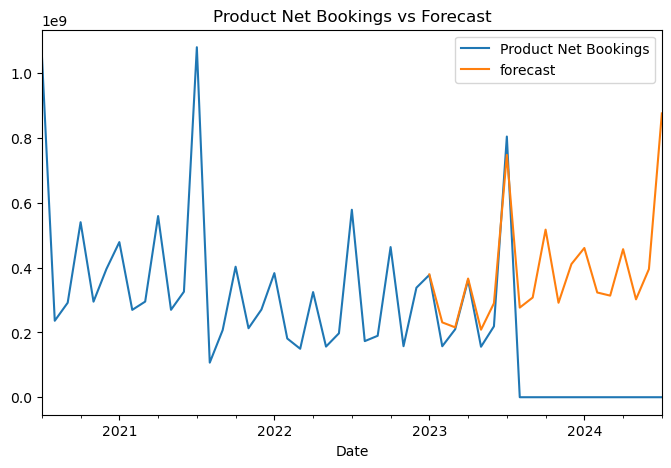

In [25]:
future_df['forecast']=train_data.predict(start=30, end=49, dynamic=True)
# Plot the original and forecast values
future_df[['Product Net Bookings', 'forecast']].plot(figsize=(8, 5))
plt.title('Product Net Bookings vs Forecast')
plt.show()

In [26]:
#new datagrame created with non null values for forecast
future_df1=future_df[future_df['forecast'].notna()]
# check the forecast values along with the ratable rates for the last weeks
future_df1

,Product Net Bookings,Seasonal First Difference,forecast
Date,,,
2023-01-01,377575000.0,39575200.0,3.789950e+08
2023-02-01,157282100.0,-220292900.0,2.309911e+08
2023-03-01,209712000.0,52429900.0,2.156664e+08
2023-04-01,362067400.0,152355400.0,3.662995e+08
2023-05-01,155816200.0,-206251200.0,2.084149e+08
2023-06-01,218816600.0,63000400.0,2.899688e+08
2023-07-01,804615300.0,585798700.0,7.480122e+08
2023-08-01,0.0,0.0,2.765946e+08
2023-09-01,0.0,0.0,3.076602e+08


In [27]:
# Save the new dataframe in the workbook
from openpyxl import Workbook  # openpyxl helps to read and write data in excel
future_df1_selected_cols=future_df1[['Product Net Bookings','forecast']]

# Remove the time part from the index by formatting it as date only
future_df1_selected_cols.index = future_df1_selected_cols.index.strftime('%Y-%m-%d')

future_df1_selected_cols.to_excel('SARIMA_bookings_collab_ww_season12.xlsx', index=True, engine='openpyxl')
print('Yes the file is downloading...')

Yes the file is downloading...


In [28]:
### Draw Line chart graph in excel and save it.

import xlsxwriter

# Create an Excel writer object and use xlsxwriter as the engine
with pd.ExcelWriter('SARIMA_bookings_collab_ww_season12.xlsx', engine='xlsxwriter') as writer:
    
    
    # Write the DataFrame to Excel
    future_df1_selected_cols.to_excel(writer, sheet_name='Performance', index=True)

    # Access the workbook and worksheet objects
    workbook = writer.book
    worksheet = writer.sheets['Performance']
    
    # Create a chart object (line chart)
    chart = workbook.add_chart({'type': 'line'})

    # Configure the first series (Actuals)
    chart.add_series({
        'name': 'Product Net Bookings',
        'categories': ['Performance', 1, 0, 20, 0],  # (sheet_name, start_row=1, start_col=0 always, end_row=42, end_col=0 always)
        'values': ['Performance', 1, 1, 20, 1],      # (sheet_name, start_row=1, start_col=1, end_row=42, end_col)
    })

    # Configure the second series (Forecast)
    chart.add_series({
        'name': 'forecast',
        'categories': ['Performance', 1, 0, 20, 0],  # Date column for categories
        'values': ['Performance', 1, 2, 20, 2],      # Forecast values (row 1 to 42, column 2)
    })

    # Add a chart title and axis labels
    chart.set_title({'name': 'Actuals vs Forecast'})
    chart.set_x_axis({'name': 'Monthly'})
    chart.set_y_axis({'name': 'Values'})
    
    # Set a fixed size for the chart (width and height in pixels)
    chart.set_size({'width': 1000, 'height': 600})  # You can adjust these values
    
    # Insert the chart into the worksheet
    worksheet.insert_chart('E2', chart)
    
    print('Yes the file is downloading...')

Yes the file is downloading...
